Troy Mazerolle

Student Number 8972394

# Lab 9 - Dense Neural Network

In [1]:
# Utility Libraries
import numpy as np

# # Plotting Libraries
import matplotlib.pyplot as plt

# # sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense

# Set seed for reproducability
keras.utils.set_random_seed(8972394)

## 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with.

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

First, let's look at the structure of the data.  I would like to see how many training and testing observations we have, as well as the categories we have in the target label.

In [3]:
categories = np.unique(y_train)
print("Shape of training features:", X_train.shape)
print("Shape of training targets:", y_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of testing targets:", y_test.shape)
print("Target categories:", categories)

Shape of training features: (60000, 28, 28)
Shape of training targets: (60000,)
Shape of testing features: (10000, 28, 28)
Shape of testing targets: (10000,)
Target categories: [0 1 2 3 4 5 6 7 8 9]


Our training data consists of 60,000 28*28 matricies representing images, and our testing data contains another 10,000.  The target variable contains ten unique categories, labeled from 0 to 9.  From the fashion_mnist.load data documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data), we know what each label corresponds to.  We will create a dictionary to map the values to their label name since it will be useful to evaluate errors in the last part.

In [4]:
display_labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 
                  4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 
                  8: "Bag", 9: "Ankle boot"}
category_labels = np.vectorize(lambda x: display_labels[x])(categories)

I also want to get a sense of what our images look like.  To do this, we will graph the first instance of each target.

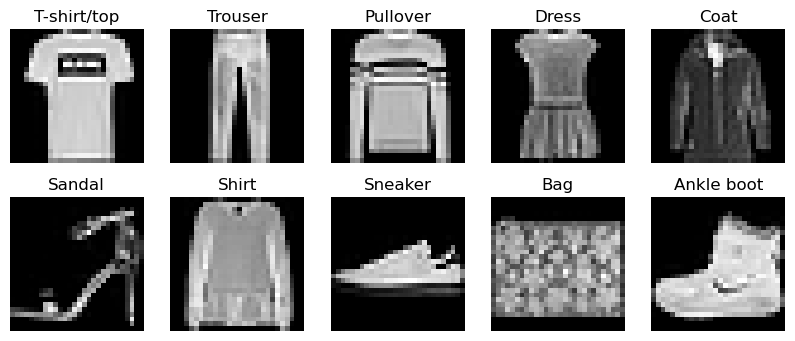

In [5]:
plt.figure(figsize=(10, 4))
y_train_aslist = y_train.tolist()
for i in range(len(categories)):
    plt.subplot(2, 5, i + 1)
    first_index = y_train_aslist.index(categories[i])
    plt.imshow(X_train[first_index].reshape(28, 28), cmap = 'gray')
    plt.title(category_labels[y_train[first_index]])
    plt.axis('off')
plt.show()

## 2. Train a dense neural network using Keras

First we need to transform the data.  The feature arrays need to be transformed into 2-D arrays that contain 60,000 rows of 784 (28*28) features.  The features also need to be normalized to be between 0 and 1.  To (crudely) show that the values have been normalized, we will output the sum of matrix elements before and after the normalization.

In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]).astype("float32")
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]).astype("float32")
print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)

print("Sum of training elements before normalization:", sum(sum(X_train)))
X_train = X_train / 255.0
print("Sum of training elements after normalization:", sum(sum(X_train)))

print("Sum of testing elements before normalization:", sum(sum(X_test)))
X_test = X_test / 255.0
print("Sum of training elements after normalization:", sum(sum(X_test)))

Shape of training features: (60000, 784)
Shape of testing features: (10000, 784)
Sum of training elements before normalization: 3431114169.0
Sum of training elements after normalization: 13455973.118989483
Sum of testing elements before normalization: 573469082.0
Sum of training elements after normalization: 2248891.7327095307


Since the sum of elements in the training and testing sets shrunk by a factor of about 255, so the normalization was successful.  We can also see that the training and testing features have 60,000 rows and 784 columns, so transforming the data into a 2-D array was also successful.

We now move on to training the model.

In [7]:
# Initializing model
dense_nn = keras.Sequential()

# Adding layers
dense_nn.add(Dense(512, activation = "relu", input_shape = (X_train.shape[1],)))
dense_nn.add(Dense(512, activation = "relu"))
dense_nn.add(Dense(len(categories), activation = "softmax"))

# Compiling neural network
dense_nn.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
# dense_nn.summary()

# Training the model
fitted_nn = dense_nn.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4669 - accuracy: 0.8304 - val_loss: 0.4042 - val_accuracy: 0.8526
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3539 - accuracy: 0.8689 - val_loss: 0.4020 - val_accuracy: 0.8528
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3180 - accuracy: 0.8807 - val_loss: 0.3485 - val_accuracy: 0.8725
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8885 - val_loss: 0.3461 - val_accuracy: 0.8802
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2784 - accuracy: 0.8959 - val_loss: 0.3493 - val_accuracy: 0.8735
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.8999 - val_loss: 0.3451 - val_accuracy: 0.8773
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9056 - val_loss: 0.3420 - val_accuracy:

Lastly, we will generate a set of predictions and test them against their actual values.

In [8]:
y_pred_matrix = dense_nn.predict(X_test)
print("Percent classificaiton of each target category:")
y_pred_matrix[:5]

313/313 [==============================] - 0s 834us/step
Percent classificaiton of each target category:


array([[3.95215916e-10, 6.77209747e-11, 2.37962876e-08, 2.30445975e-11,
        6.90381454e-13, 1.76498012e-04, 1.49662807e-08, 5.11141207e-06,
        2.51063142e-10, 9.99818385e-01],
       [2.89179843e-05, 1.84111293e-16, 9.99572933e-01, 2.25119272e-12,
        1.26388681e-04, 1.09723781e-16, 2.71758996e-04, 1.41585080e-19,
        1.52224208e-13, 4.22182875e-25],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.09244377e-34,
        2.38563823e-34, 0.00000000e+00, 3.41014328e-28, 0.00000000e+00,
        1.95977566e-35, 0.00000000e+00],
       [1.02925509e-01, 1.58850772e-17, 1.06921296e-04, 3.13427968e-08,
        3.89909583e-05, 1.56531345e-16, 8.96928489e-01, 1.05997909e-19,
        2.26997511e-13, 6.59488355e-19]], dtype=float32)

The model will evaluate the percent chance that the observation belongs to each category.  We can take the target with the highest percent chance and make that the prediction.

In [9]:
y_pred = np.argmax(y_pred_matrix, axis = 1)
print("Predicted values:", y_pred)

Predicted values: [9 2 1 ... 8 1 5]


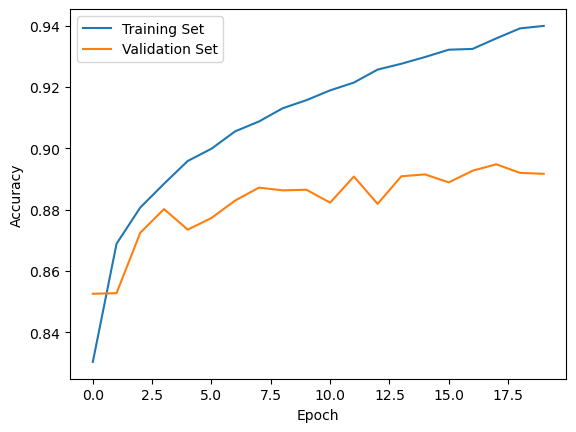

In [10]:
plt.plot(fitted_nn.history["accuracy"])
plt.plot(fitted_nn.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Set", "Validation Set"]);

## 3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration.

We start by looking at the total accuracy of the model and the confusion matrix.

Total accuracy: 0.8917


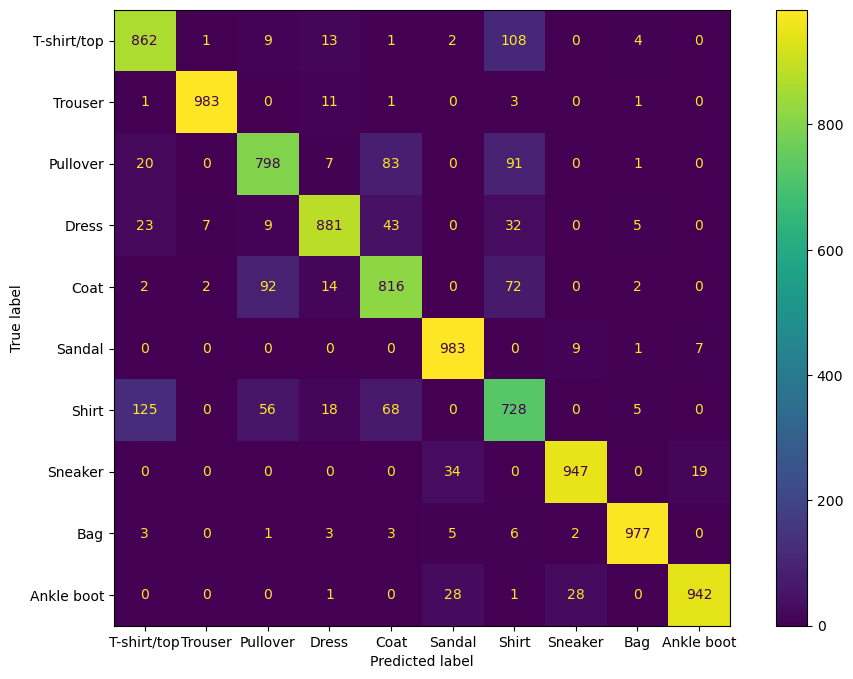

In [11]:
print("Total accuracy:", sum(y_test == y_pred) / len(y_test))

fig, ax = plt.subplots(figsize=(12,8))
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels = category_labels).plot(ax = ax);

Our model has an 89.19% accuracy on the test set.

Our confusion matrix seems strong, but there is a noticable amount of misclassifications around `T-shirt/top`, `Pullover`, `Coat`, and `Shirt`.  We can go back and examine the percent chance that These categories had to be classified with each other.

In [12]:
misclass_filter = (~(y_test == y_pred)).astype(bool)

shirt_filter = np.zeros(len(y_test)).astype(int)
for i in range(len(shirt_filter)):
    if y_test[i] == 0 or y_test[i] == 2 or y_test[i] == 4 or y_test[i] == 6:
        shirt_filter[i] = 1
shirt_filter = shirt_filter.astype(bool)

shirt_misclass_filter = np.logical_and(shirt_filter, misclass_filter)
shirt_misclasses = y_pred_matrix[shirt_misclass_filter, :7:2] # columns kept with :7:2 correspond to 0, 2, 4, 6 which are the shirt variant columns

# Print first 10 rows
print("Percent classifications of T-shirt/top, Pullover, Coat, and Shirt:")
for i in range(10):
    print(shirt_misclasses[i])

Percent classifications of T-shirt/top, Pullover, Coat, and Shirt:
[0.0020793  0.84720063 0.14972807 0.00099139]
[3.9152932e-05 9.1663420e-01 5.4063037e-02 2.9263182e-02]
[4.8541316e-01 1.2967539e-04 2.1728451e-06 5.1132870e-01]
[7.8471375e-01 1.1246010e-05 2.1626713e-06 2.1527269e-01]
[2.6384876e-05 2.9981744e-01 3.6845338e-03 6.9646877e-01]
[1.47150058e-04 1.04494706e-01 3.97977699e-03 8.91350091e-01]
[3.1873100e-05 9.6544093e-01 3.1914141e-02 2.6130483e-03]
[0.00681941 0.6541705  0.3008803  0.03809265]
[3.4430940e-04 5.1325344e-02 1.8771729e-05 9.4831085e-01]
[0.48657656 0.2970074  0.1562678  0.05996184]


In some cases earlier, we saw classified targets have a probability as high as over 99.99% and as low as the 10e-30 range.  However, this is not the case for the probabilities above.  The above matrix are the t-shirts, pullovers, coats, and shirts that were misclassified as each other.  We can see from the above that each row of probabilities are a lot closer to each other, and it is not as easy to distinguish the "clear" correct target with extremely high probability against the "clear" wrong targets with extremely low probabilities.

I am also personally curious about some of the uncommon misclassifications.  For example, there was one instance where an ankle boot was misclassified as a shirt.  I would like to see the plot of the ankle boot.  To find the correct image data, I need the index that corresponds to $y\_test == 9$ and $y\_pred == 6$.

In [13]:
# ankle_boot_filter = y_test == 9
# dress_filter = y_pred == 6
# boot_dress_misclass = np.logical_and(ankle_boot_filter, dress_filter)

# plt.imshow(X_test[boot_dress_misclass].reshape(28, 28), cmap = 'gray')
# plt.title("Ankle Boot Misclassified\nas a Shirt")
# plt.axis('off');

## BONUS: Fine-Tuning the Model

While this is not part of the assignment, I wanted to take some time to practice fine-tuning the model and seeing if I can make it more accurate.  I understand that this part will not be graded, but if there is any feedback I would appreciate it.

In [14]:
import pandas as pd

def neural_network_optimizer(x, y, x_val, y_val, batches, nodes, layers, activation_list = ["relu"], num_epochs = 10, output_activation_function = "softmax", 
                             optimizer = "adam", loss_function = "sparse_categorical_crossentropy", accuracy_metrics = ["accuracy"], verbose = True):

    categories = np.unique(y)

    batch_count = []
    node_count = []
    activation_function = []
    layer_count = []
    accuracy = []

    for actfunc_index in range(len(activation_list)):
        for batch_index in range(len(batches)):
            for node_index in range(len(nodes)):
                for layer_index in range(len(layers)):

                    # Initializing model
                    dense_nn = keras.Sequential()

                    # Adding first layer
                    dense_nn.add(Dense(nodes[node_index], activation = activation_list[actfunc_index], input_shape = (X_train.shape[1],)))

                    # Adding more layers
                    for num_layers in range(layers[layer_index] - 1):
                        dense_nn.add(Dense(nodes[node_index], activation = activation_list[actfunc_index]))
                    
                    # Adding output layer
                    dense_nn.add(Dense(len(categories), activation = output_activation_function))

                    # Compiling neural network
                    dense_nn.compile(optimizer = optimizer, loss = loss_function, metrics = accuracy_metrics)

                    # Training the model
                    fitted_nn = dense_nn.fit(x, y, batch_size = batches[batch_index], epochs = num_epochs, validation_data = (x_val, y_val), verbose = 0)

                    activation_function.append(activation_list[actfunc_index])
                    batch_count.append(batches[batch_index])
                    node_count.append(nodes[node_index])
                    layer_count.append(layers[layer_index])
                    accuracy.append(fitted_nn.history["val_accuracy"][len(fitted_nn.history["val_accuracy"]) - 1])

                    if verbose:
                        print("Activation Function Used:", activation_list[actfunc_index], ",", actfunc_index + 1, "/", len(activation_list), "complete")
                        print("Batches Used:", batches[batch_index], ",", batch_index + 1, "/", len(batches), "complete")
                        print("Nodes Used:", nodes[node_index], ",", node_index + 1, "/", len(nodes), "complete")
                        print("Layers Used:", layers[layer_index], ",", layer_index + 1, "/", len(layers), "complete")
                        print("Accuracy:", fitted_nn.history["val_accuracy"][len(fitted_nn.history["val_accuracy"]) - 1])
                        print()

    results = pd.DataFrame()
    results["ActivationFunction"] = activation_function
    results["Layers"] = layer_count
    results["Batches"] = batch_count
    results["Nodes"] = node_count
    results["Accuracy"] = accuracy
    return list(results, results.iloc[np.argmax(results["Accuracy"])])

# batches = np.linspace(16, 16*10, 10).astype(int)
# nodes = np.linspace(10, 784, 10).astype(int)
# activation_functions = ["linear", "sigmoid", "tanh", "relu", "leaky_relu", "elu"]
batches = np.linspace(16, 16*10, 5).astype(int)
nodes = np.linspace(10, 784, 5).astype(int)
activation_functions = ["linear", "relu"]
layers = [1,2,3]


results, best_features = neural_network_optimizer(x = X_train, y = y_train, x_val = X_test, y_val = y_test, activation_list = activation_functions,
                                                  num_epochs = 20, batches = batches, nodes = nodes, layers = layers)
results

Activation Function Used: linear , 1 / 2 complete
Batches Used: 16 , 1 / 5 complete
Nodes Used: 10 , 1 / 5 complete
Layers Used: 1 , 1 / 3 complete
Accuracy: 0.8413000106811523

Activation Function Used: linear , 1 / 2 complete
Batches Used: 16 , 1 / 5 complete
Nodes Used: 10 , 1 / 5 complete
Layers Used: 2 , 2 / 3 complete
Accuracy: 0.839900016784668

Activation Function Used: linear , 1 / 2 complete
Batches Used: 16 , 1 / 5 complete
Nodes Used: 10 , 1 / 5 complete
Layers Used: 3 , 3 / 3 complete
Accuracy: 0.8384000062942505

Activation Function Used: linear , 1 / 2 complete
Batches Used: 16 , 1 / 5 complete
Nodes Used: 203 , 2 / 5 complete
Layers Used: 1 , 1 / 3 complete
Accuracy: 0.8345999717712402

Activation Function Used: linear , 1 / 2 complete
Batches Used: 16 , 1 / 5 complete
Nodes Used: 203 , 2 / 5 complete
Layers Used: 2 , 2 / 3 complete
Accuracy: 0.8367999792098999

Activation Function Used: linear , 1 / 2 complete
Batches Used: 16 , 1 / 5 complete
Nodes Used: 203 , 2 / 5 c

,ActivationFunction,Layers,Batches,Nodes,Accuracy
0,linear,1,16,10,0.8413
1,linear,2,16,10,0.8399
2,linear,3,16,10,0.8384
3,linear,1,16,203,0.8346
4,linear,2,16,203,0.8368
...,...,...,...,...,...
145,relu,2,160,590,0.8968
146,relu,3,160,590,0.8932
147,relu,1,160,784,0.8933
148,relu,2,160,784,0.8954


C:\Users\tjmaz\AppData\Local\Temp\ipykernel_20892\58588094.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(results[results["Layers"] == 3][results["Batches"] == 52][results["ActivationFunction"] == "relu"]["Accuracy"])
C:\Users\tjmaz\AppData\Local\Temp\ipykernel_20892\58588094.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(results[results["Layers"] == 3][results["Batches"] == 52][results["ActivationFunction"] == "relu"]["Accuracy"])


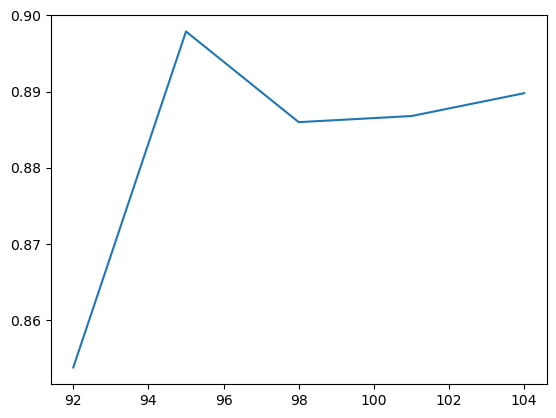

In [43]:

plt.plot(results[results["Layers"] == 3][results["Batches"] == 52][results["ActivationFunction"] == "relu"]["Accuracy"])